In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt

image = imread('resources/auto.jpg')
plt.title("original image")
plt.axis('off') 
plt.imshow(image)

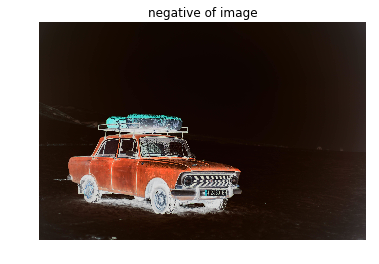

In [2]:
negative = 255 - image
#find the negative of image
plt.title("negative of image")
plt.axis('off') 
plt.imshow(negative)

grayscale the negative

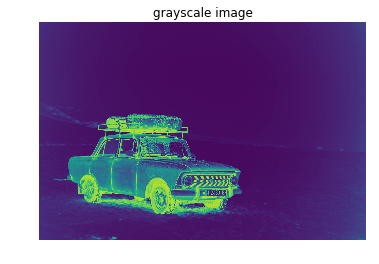

In [3]:
from skimage import color
from skimage import io

grayscale = color.rgb2gray(negative)
plt.title("grayscale image")
plt.axis('off') 
plt.imshow(grayscale)

In [4]:
print grayscale.shape
import numpy as np

# print grayscale.reshape(3396, 5094/3, 3)
print grayscale[0]
print grayscale[1]
print grayscale[2]
print grayscale[3]
print grayscale[4]

(3396, 5094)
[0.13941961 0.13941961 0.13941961 ... 0.20107843 0.20107843 0.20107843]
[0.13941961 0.13941961 0.13941961 ... 0.20107843 0.20107843 0.20107843]
[0.13941961 0.13941961 0.13941961 ... 0.20107843 0.20107843 0.20107843]
[0.13941961 0.13941961 0.13941961 ... 0.20107843 0.20107843 0.20107843]
[0.13941961 0.13941961 0.13941961 ... 0.20107843 0.20107843 0.20107843]


In [5]:
from sklearn.decomposition import PCA
import numpy as np

ipca = PCA(1000).fit(grayscale)
transformed = ipca.transform(grayscale)
print transformed.shape

(3396, 1000)


(3396, 5094)


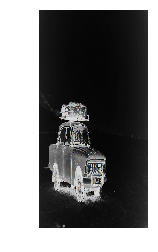

In [6]:
inversed_img = ipca.inverse_transform(transformed)
print inversed_img.shape
plt.axis('off')
plt.imshow(inversed_img.reshape(3396, 5094/3, 3))

# color quantization

In [18]:
import cv2
from sklearn.cluster import MiniBatchKMeans

# load the image and grab its width and height
image = cv2.imread('resources/auto.jpg')
(h, w) = image.shape[:2]
 
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
 
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
 
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 2)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
 
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))
 
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

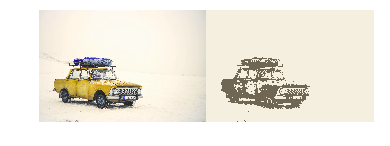

In [19]:
plt.axis('off')
plt.imshow(np.hstack([image, quant]))

In [20]:
#image.reshape(-1, image.shape[2])
print 'colors in original image:' , len(np.unique(image.reshape(-1, image.shape[2]), axis=0))
print 'colors in negative image:' , len(np.unique(negative.reshape(-1, negative.shape[2]), axis=0))
print 'colors in quant image:' , len(np.unique(quant.reshape(-1, quant.shape[2]), axis=0))

colors in original image: 183390
colors in negative image: 280382
colors in quant image: 2


In [24]:
# print quant.reshape(-1, quant.shape[2])
# colors = np.unique(quant.reshape(-1, quant.shape[2]))
# print colors

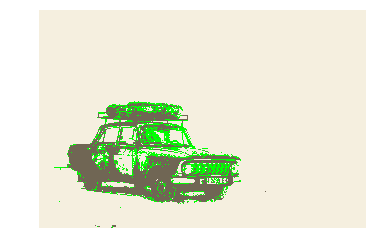

In [26]:
imgray = cv2.cvtColor(quant,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(quant, contours, -1, (0,255,0), 3)
plt.axis('off')
plt.imshow(img)